In [1]:
#Update  the data preprocessing issues found !!!!!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# configure cell
sns.set(rc={'figure.figsize' : (11,3)})

In [3]:
cur = os.getcwd()
path = os.path.join(os.getcwd(),"data","wisdm_cln.csv")
df = pd.read_csv(path)

In [4]:
print(df.shape)

(1098204, 6)


In [5]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [6]:
df[df['activity']=='Jogging']['x-axis'].min()

-19.61

In [7]:
def act_axis_analyse(activity,axis):
    act = df[df['activity'] == activity][axis].values
    act.reshape(-1,1)
    print("___________statistics____________")
    print(f"minimum {np.min(act)}")
    print(f"mean   :{np.mean(act)}")
    print(f"max val:{np.max(act)}")
    print(f"varience: {np.std(act)}")
    print(f"shape :{act.shape}")
    sns.boxplot(act)
    samples = act[:200]
    # plt.plot(samples , subplots = True)

___________statistics____________
minimum -19.61
mean   :-0.20198090433382226
max val:19.95
varience: 9.109491927070843
shape :(342176,)


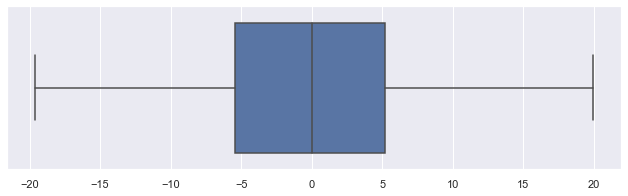

In [8]:
act_axis_analyse('Jogging','x-axis')

In [9]:
any(df.isna())
print(any(df.isnull()))

True


In [10]:
df.columns

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')

In [8]:
def checknan():
    for i in df.columns:
        if df[i].isnull().values.any():
            print(f" the column {i} contains nulll values")

In [9]:
df['x-axis'].isnull().values.any()

False

In [14]:
# solving missing values problem via linear interpolation
df.interpolate(method='linear', inplace=True, axis = 1, )

In [10]:
checknan()

 the column z-axis contains nulll values


___________statistics____________
minimum -19.61
mean   :-0.20198090433382226
max val:19.95
varience: 9.109491927070843
shape :(342176,)


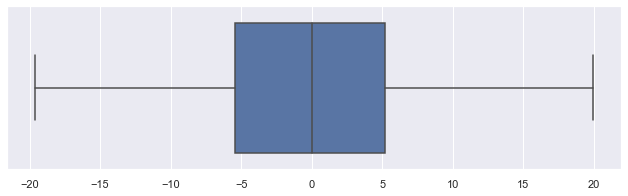

In [16]:
act_axis_analyse('Jogging','x-axis')

In [6]:
# applyting the normalization
from sklearn.preprocessing import normalize

In [18]:
# converting the dataframe to features and target
target = df['activity'].values
target = target.reshape(-1,1)
print(target.shape)
# creating feature matrix
features = df[['x-axis', 'y-axis', 'z-axis']].values
features.shape

(1098204, 1)


(1098204, 3)

In [19]:
normalize(features, copy=False)

array([[-0.05465478,  0.9977177 ,  0.03965151],
       [ 0.4053382 ,  0.91090953,  0.07710237],
       [ 0.41078201,  0.91170789, -0.00684637],
       ...,
       [ 0.9723227 , -0.14777592,  0.18097196],
       [ 0.96979324, -0.15732201,  0.18641581],
       [ 0.97344432, -0.1457974 ,  0.17649159]])

In [20]:
def plot_time_data(time, series, format="-", start = 0, end = None, label = None):
  """plot a time series data"""
  plt.plot(time[start:end], series[start:end], format, label)
  plt.xlabel("time")
  plt.ylabel("Values")
  if label:
    plt.legend()
  plt.grid(True)

In [21]:
features.shape

(1098204, 3)

In [22]:
# taking just 200 values and plotting
print(np.unique(target[200]))

['Jogging']


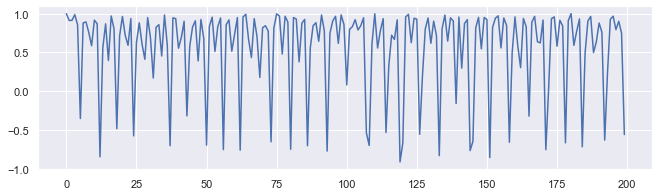

In [23]:
# all the values belongs to class jogging
sample = features[:200,1]
t = np.arange(200)
plt.plot(t,sample,'-')

In [24]:
# checking the index of each class
print(np.unique(df['activity']))

['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking']


In [25]:
# walking 597
# Downsta 1769
#upst 1161
print(np.unique(target[597:797])) # walking only
print(np.unique(target[1769:1969])) # Downstairs only
print(np.unique(target[1161:1361])) #upstairs only

['Walking']
['Downstairs']
['Upstairs']


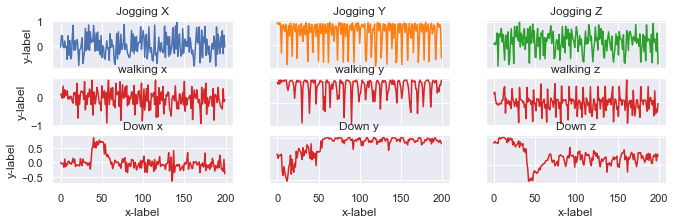

In [26]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].plot(t,features[:200,0])
axs[0, 0].set_title('Jogging X')
axs[0, 1].plot(t,features[:200,1], 'tab:orange')
axs[0, 1].set_title('Jogging Y')
axs[0, 2].plot(t,features[:200,2], 'tab:green')
axs[0, 2].set_title('Jogging Z')
axs[1, 0].plot(t,features[597:797,0], 'tab:red')
axs[1, 0].set_title('walking x')
axs[1, 1].plot(t,features[597:797,1], 'tab:red')
axs[1, 1].set_title('walking y')
axs[1, 2].plot(t,features[597:797,2],  'tab:red')
axs[1, 2].set_title('walking z')
axs[2, 0].plot(t,features[1769:1969,0], 'tab:red')
axs[2, 0].set_title('Down x')
axs[2, 1].plot(t,features[1769:1969,1], 'tab:red')
axs[2, 1].set_title('Down y')
axs[2, 2].plot(t,features[1769:1969,2], 'tab:red')
axs[2, 2].set_title('Down z')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, 'walking')

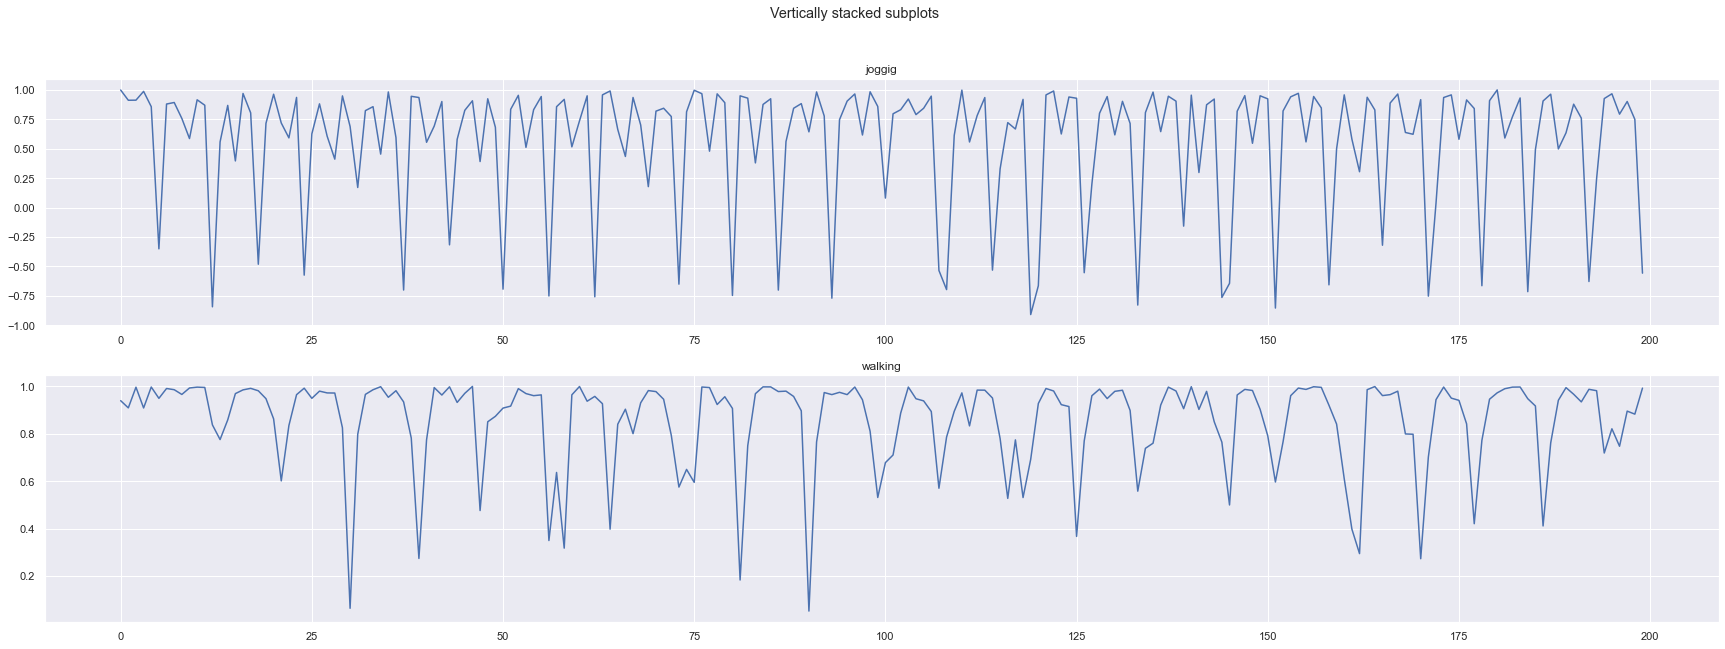

In [27]:

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(30)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, features[:200,1])
ax1.set_title('joggig')
ax2.plot(t, features[597:797,1])
ax2.set_title("walking")

In [35]:
# updating plot_series 
def plot_series(time, series, start , stop):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.set_figheight(14)
    fig.set_figwidth(30)
    fig.suptitle('Vertically stacked subplots')
    ax1.plot(time, series[start:stop,0], 'tab:red')
    ax1.set_title('x-axis')
    ax2.plot(time, series[start:stop,1], 'tab:green')
    ax2.set_title("y-axis")
    ax3.plot(time,series[start:stop, 2],'tab:blue')
    ax3.set_title("z-axis")

jogging


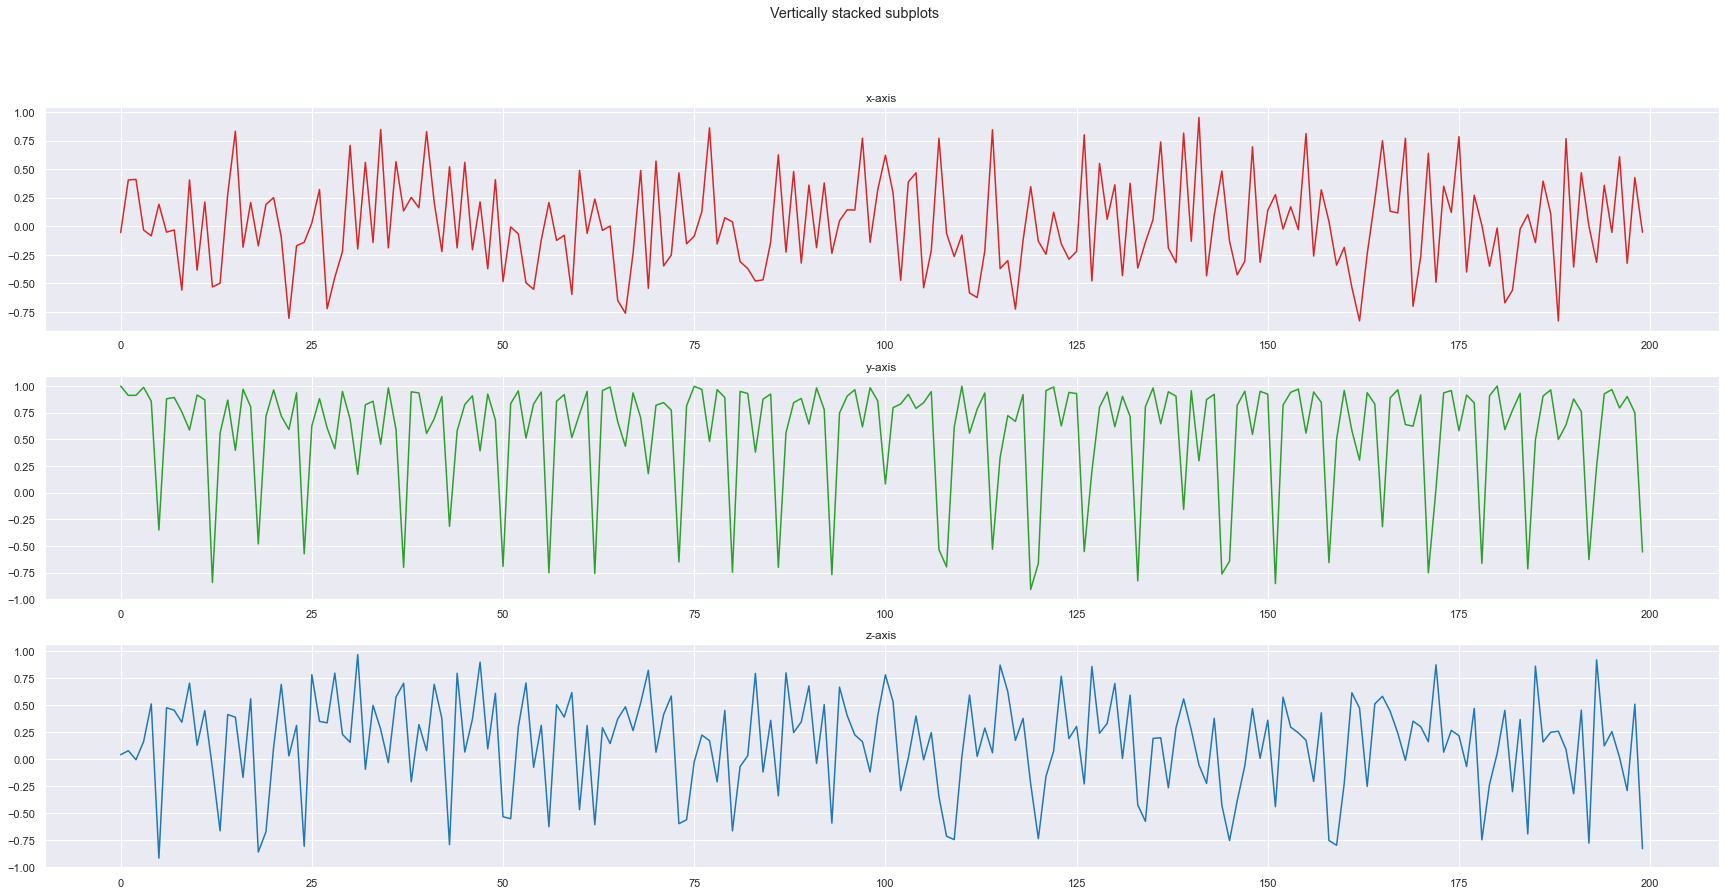

In [38]:
print("jogging")
t =np.arange(200)
plot_series(t, features,0,200)

Walking


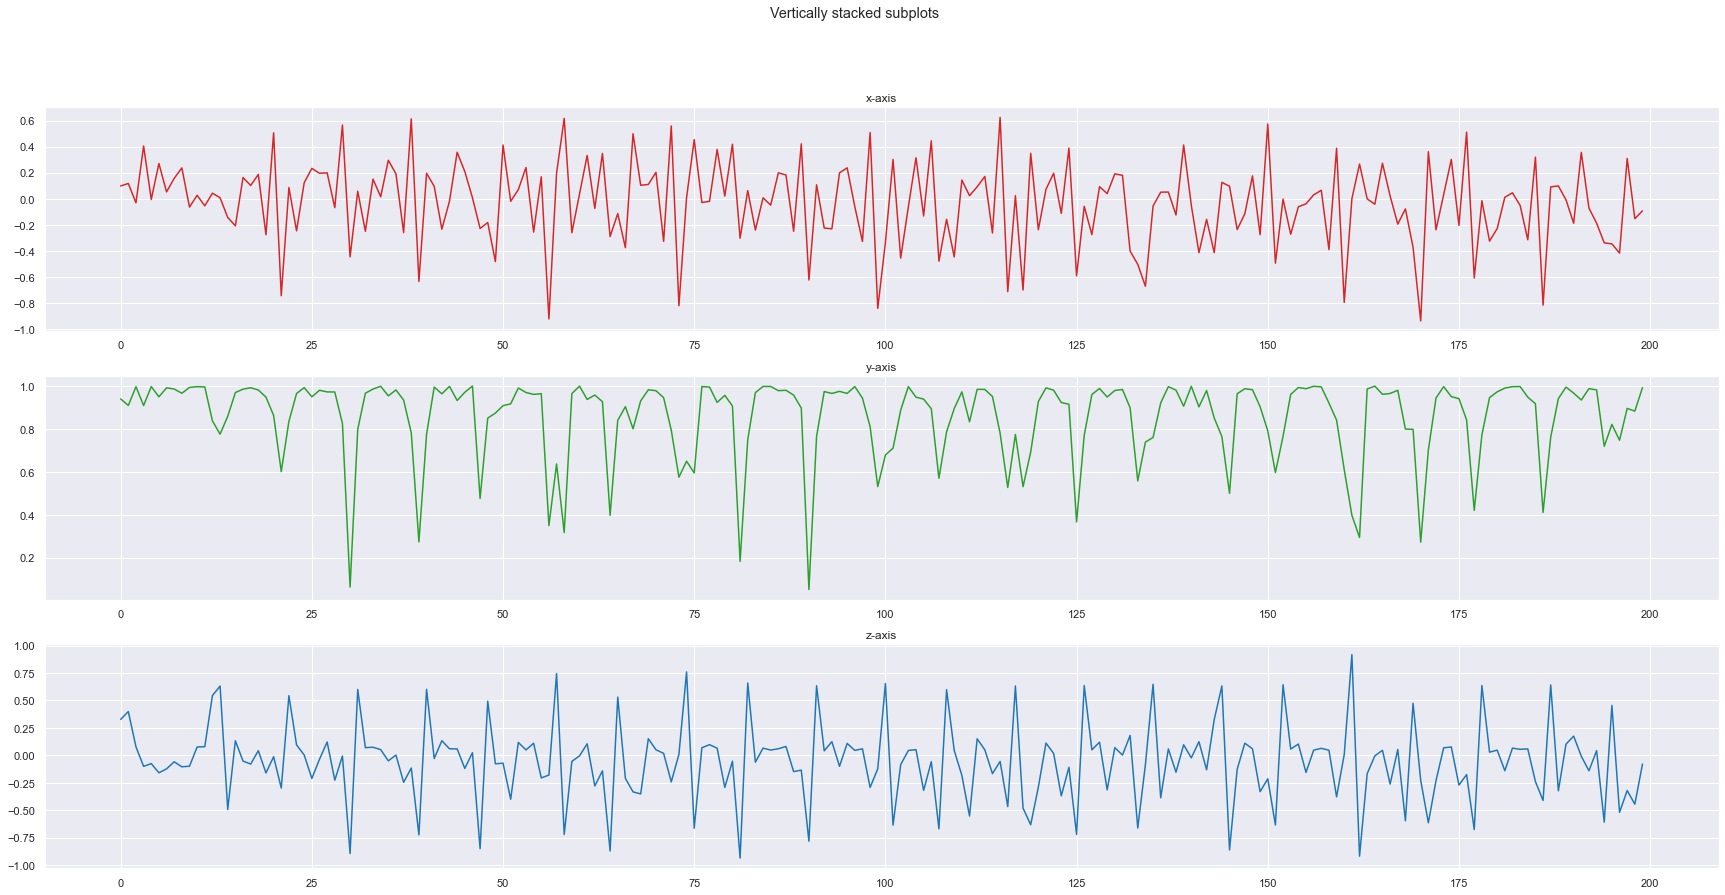

In [37]:
print("Walking")
plot_series(t,features,597,797)